In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import wolframalpha
from datetime import datetime

In [2]:
catalysts = pd.read_html(r'https://www.biopharmcatalyst.com/calendars/historical-catalyst-calendar')
catalysts = catalysts[0]
catalysts.head()

,Ticker,Drug,Stage,Catalyst
0,SPPI,ZEVALIN Non-Hodgkin’s lymphoma,CRL,"07/05/2009 CRL received July 5, 2009."
1,ZGNX,Sumavel Migraine,Approved,"07/16/2009 Approved July 16, 2009."
2,ARDM,Sumavel Migraine,Approved,"07/16/2009 Approval granted July 16, 2009."
3,SPPI,ZEVALIN Non-Hodgkin’s lymphoma,Approved,"09/04/2009 Approved September 4, 2009."
4,SPPI,FUSILEV Colorectal cancer,CRL,"10/09/2009 CRL received October 9, 2009."


In [3]:
catalysts['Date'] = catalysts.Catalyst.str.slice(stop=10)

In [4]:
catalysts['Date'] = pd.to_datetime(catalysts['Date'], errors='ignore')

In [5]:
# Data ends on 11/10/2017
catalysts = catalysts[catalysts.Date < datetime.strptime('Nov 10 2016', '%b %d %Y')].reset_index(drop=True)

In [6]:
catalysts.shape

(191, 5)

In [7]:
final = pd.DataFrame(columns=['Ticker', 'Timepoint', 'Open', 'High', 'Low', 'Close', 'Volume', 'Stage', 'Return'])
for index, row in catalysts.iterrows():
    ticker = row['Ticker']
    event = row['Date']
    try:
        df = pd.read_csv(r'../Data/Data/Stocks/' + ticker.lower() + '.us.txt')
    except:
        print('{} : {}'.format(index, ticker))
        continue
    df['Ticker'] = ticker
    df['Stage'] = row['Stage']
    df['Date'] = pd.to_datetime(df['Date'])
    start = event - np.timedelta64(370, 'D')
    end = event + np.timedelta64(370, 'D')
    df = df[df['Date'] > start]
    df = df[df['Date'] < end]
    df = df.reset_index(drop=True)
    if df.shape[0] == 0:
        print('Error on {}: {}'.format(index, ticker))
        continue
    start_price = df['Open'].iloc[0]
    df['Return'] = df['Close'] / start_price
    df['Timepoint'] = (df['Date'] - event).dt.days
    df = df.drop(['Date', 'OpenInt'], axis=1)
    final = pd.concat([final, df], ignore_index=True)

/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Error on 1: ZGNX
Error on 2: ARDM
Error on 7: FCSC
Error on 12: HRTX
Error on 13: CTIC
17 : ASRT
Error on 20: FCSC
23 : EYPT
48 : ASRT
55 : EYPT
79 : EYPT


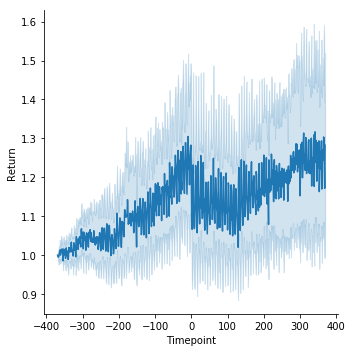

In [51]:
sns.relplot(x='Timepoint', y='Return', kind='line', data=final)

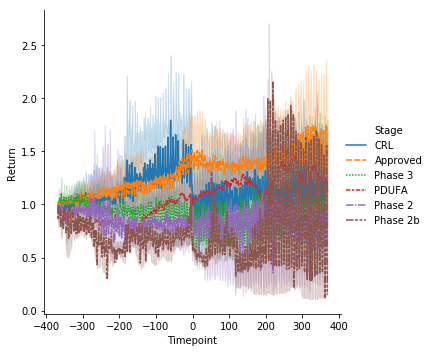

In [52]:
sns.relplot(x='Timepoint', y='Return', kind='line', hue='Stage', style='Stage', data=final)

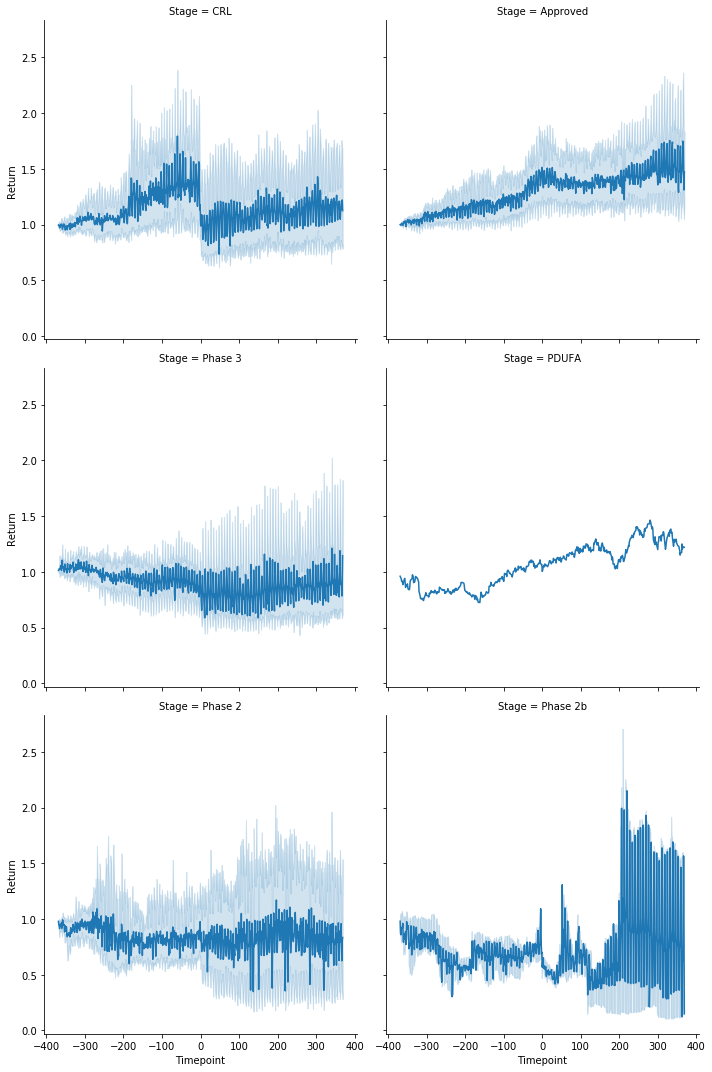

In [53]:
sns.relplot(x='Timepoint', y='Return', kind='line', col='Stage', col_wrap=2, data=final)

In [20]:
finalfinal = final.copy()
finalfinal['Stage'].loc[finalfinal.Stage == 'CRL'] = 'Final'
finalfinal['Stage'].loc[finalfinal.Stage == 'Approved'] = 'Final'

/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


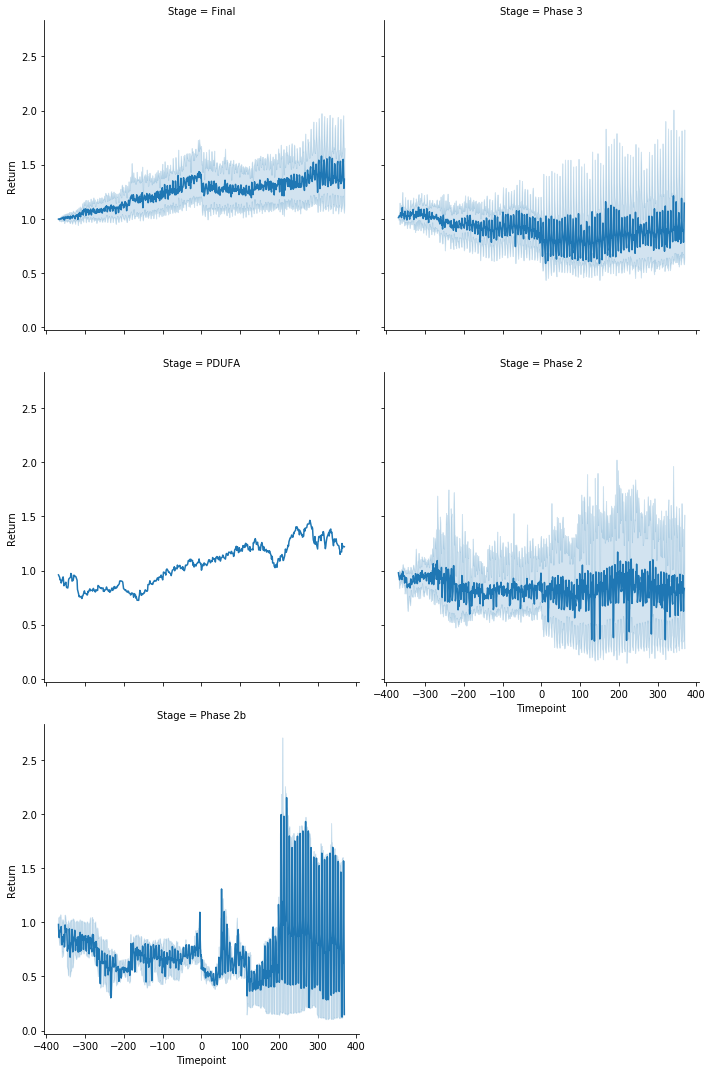

In [64]:
sns.relplot(x='Timepoint', y='Return', kind='line', col='Stage', col_wrap=2, data=finalfinal)

In [63]:
finalfinal.Stage.value_counts()

Final       63170
Phase 3     20367
Phase 2      4512
Phase 2b     1528
PDUFA         508
Name: Stage, dtype: int64

In [21]:
finalfinal.Ticker.unique()

array(['SPPI', 'PRTK', 'HEB', 'ACOR', 'ALKS', 'MNKD', 'JAZZ', 'VVUS',
       'PLX', 'SGEN', 'PCRX', 'ALIM', 'INCY', 'ATRS', 'INSY', 'CRIS',
       'CORT', 'EBS', 'RGEN', 'ARNA', 'AMRN', 'HALO', 'NAVB', 'SUPN',
       'EXEL', 'IMGN', 'DVAX', 'HRTX', 'TTNP', 'ENDP', 'AVDL', 'AVEO',
       'TBPH', 'ZGNX', 'ABBV', 'AMAG', 'VNDA', 'DRRX', 'BMRN', 'MDCO',
       'OMER', 'BDSI', 'EGRX', 'ACRX', 'AKBA', 'NKTR', 'PGNX', 'AEZS',
       'ENTA', 'BCRX', 'ADMS', 'VRTX', 'NBIX', 'RMTI', 'ADMP', 'AMGN',
       'MNTA', 'MNK', 'PTX', 'NYMX', 'TTPH', 'MACK', 'GWPH', 'SPHS',
       'OTIC', 'CHRS', 'ZFGN', 'NEOS', 'RDHL', 'PTLA', 'OPK', 'CHMA',
       'ACAD', 'NLNK', 'AZN', 'ICPT', 'OCUL', 'RVNC', 'MRNS', 'CLVS',
       'LPCN', 'GSK', 'AMPE', 'CYTR', 'RARE', 'MCRB', 'ADMA', 'IONS',
       'VTVT', 'AUPH', 'EARS', 'ACRS', 'KMDA', 'RIGL', 'TNXP', 'KPTI',
       'AERI', 'NVAX', 'VICL', 'SRPT', 'GILD', 'ITCI', 'GNCA', 'ABUS',
       'MLNT', 'TENX', 'PLXP', 'PTN'], dtype=object)

In [23]:
market_caps = {'SPPI':986, 'PRTK':130, 'HEB':9, 'ACOR':363, 'ALKS':3670, 'MNKD':222, 'JAZZ':8110, 'VVUS':41,
              'PLX':67, 'SGEN':11360, 'PCRX':1780, 'ALIM':63, 'INCY':18550, 'ATRS':555}

In [24]:
df = pd.read_csv(r'../Data/Data/Stocks/SPPI.us.txt')

In [25]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,6.1173,6.2653,6.0186,6.2258,138792,0
1,2005-02-28,6.2653,6.6106,6.2061,6.4330,259735,0
2,2005-03-01,6.4231,6.6402,6.3146,6.5711,93773,0
3,2005-03-02,6.4527,7.0349,6.4330,6.9263,271317,0
4,2005-03-03,6.9263,7.3999,6.9066,7.3013,248930,0


In [18]:
client = wolframalpha.Client('K5E2LE-V8G7VT49YJ')



In [19]:
res = client.query('market cap PFE 07/10/14')

In [ ]:
client = wolframalpha.Client('K5E2LE-V8G7VT49YJ')
for index, row in catalysts.iterrows():
    res = client.query('market cap {} {}'.format(row['Ticker'], row['Date'].strftime('%m/%d/%y')))

In [39]:
res

{'@success': 'true',
 '@error': 'false',
 '@numpods': '2',
 '@datatypes': 'Financial',
 '@timedout': '',
 '@timedoutpods': '',
 '@timing': '1.2530000000000001',
 '@parsetiming': '0.467',
 '@parsetimedout': 'false',
 '@recalculate': '',
 '@id': 'MSPa25221ec351bh036bfgb000002h8fcd8d54bb949d',
 '@host': 'https://www3.wolframalpha.com',
 '@server': '53',
 '@related': 'https://www3.wolframalpha.com/api/v2/relatedQueries.jsp?id=MSPa25231ec351bh036bfgb0000016dfb3066c0289g94958237475075997809',
 '@version': '2.6',
 '@nodata': 'true',
 'pod': [{'@title': 'Input interpretation',
   '@scanner': 'Identity',
   '@id': 'Input',
   '@position': '100',
   '@error': 'false',
   '@numsubpods': '1',
   'subpod': {'@title': '',
    'img': {'@src': 'https://www3.wolframalpha.com/Calculate/MSP/MSP25241ec351bh036bfgb00000485072i310aacgi7?MSPStoreType=image/gif&s=53',
     '@alt': 'Pfizer | market capitalization | Thursday, July 10, 2014',
     '@title': 'Pfizer | market capitalization | Thursday, July 10, 20

In [40]:
catalysts.to_hdf('data.h5', mode='a', key='catalysts')

In [41]:
final.to_hdf('data.h5', mode='a', key='final')

/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->['Stage', 'Ticker', 'Timepoint', 'Volume']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
